In [2]:
import sys
print(sys.executable)

c:\Program Files\Python312\python.exe


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Dicionário agrupando as variantes dos nomes
fabricantes = {
    "ASTRAZENECA": ["ASTRAZENECA", "ASTRAZENECA AB", "ASTRAZENECA/FIOCRUZ", "ASTRAZENECA/OXFORD", "AstraZeneca/Oxford", "Oxford-AstraZeneca", "University of Oxford/AstraZeneca"],
    "BIONTECH": ["BIONTECH", "BioNTech/Fosun Pharma/Pfizer", "Pfizer/BioNTech", "PFIZER/BIONTECH"],
    "BUTANTAN": ["Butantan/Sinovac", "FUNDACAO BUTANTAN", "INSTITUTO BUTANTAN", "SINOVAC/BUTANTAN"],
    "JANSSEN": ["JANSSEN", "JANSSEN-CILAG", "JOHNSON & JOHNSON/JANSSEN", "Janssen", "Janssen Biologics B.V.", "Janssen-Cilag"],
    "PFIZER": ["PFIZER", "PFIZER - PEDIÁTRICA", "PFIZER - PEDIÁTRICA MENOR DE 5 ANOS", "PFIZER MANUFACTURING BELGIUM NV - BELGICA", "PFIZER MANUFACTURING BELGIUM NV - BELGIVA", "PFIZER MANUFACTURING BELGIUM NV BELGIVA", "Pfizer"],
    "SINOVAC": ["SINOVAC", "SINOVAC LIFE SCIENCE CO LTD", "Sinovac"],
    "OUTROS": ["Pendente Identificação", "WYETH PHARMACEUTICALS", "SERUM INSTITUTE OF INDIA LTD", "SERUM INSTITUTE OF INDIA LTD."]
}

In [5]:
# Carregar o dataset
dataset = pd.read_csv('../../data/resultado.csv', sep=';', quotechar='"', low_memory=False)

In [6]:
# Exibir os nomes das colunas
print("Nomes das colunas no dataset:")
print(dataset.columns.tolist())

Nomes das colunas no dataset:
['sintomas', 'profissionalSaude', 'racaCor', 'outrosSintomas', 'outrasCondicoes', 'profissionalSeguranca', 'cbo', 'condicoes', 'sexo', 'estado', 'estadoIBGE', 'municipio', 'municipioIBGE', 'origem', 'estadoNotificacao', 'municipioNotificacao', 'municipioNotificacaoIBGE', 'evolucaoCaso', 'classificacaoFinal', 'codigoEstrategiaCovid', 'codigoBuscaAtivaAssintomatico', 'outroBuscaAtivaAssintomatico', 'codigoTriagemPopulacaoEspecifica', 'outroTriagemPopulacaoEspecifica', 'codigoLocalRealizacaoTestagem', 'outroLocalRealizacaoTestagem', 'codigoRecebeuVacina', 'codigoLaboratorioPrimeiraDose', 'codigoLaboratorioSegundaDose', 'lotePrimeiraDose', 'loteSegundaDose', 'codigoContemComunidadeTradicional', 'source_id', 'excluido', 'validado', 'codigoDosesVacina', 'estadoNotificacaoIBGE', 'totalTestesRealizados', 'dataNotificacao', 'dataInicioSintomas', 'dataEncerramento', 'dataPrimeiraDose', 'dataSegundaDose', 'codigoEstadoTeste1', 'codigoTipoTeste1', 'codigoFabricanteTes

In [7]:
# Limpar os valores das colunas de laboratório (remover espaços)
dataset['codigoLaboratorioSegundaDose'] = dataset['codigoLaboratorioSegundaDose'].str.strip()
dataset['codigoLaboratorioPrimeiraDose'] = dataset['codigoLaboratorioPrimeiraDose'].str.strip()

In [8]:
# Função para mapear o nome do laboratório para o dicionário de fabricantes
def mapear_fabricante(laboratorio):
    for chave, variantes in fabricantes.items():
        if laboratorio in variantes:
            return chave
    return "OUTROS"  # Caso o nome não seja reconhecido, marcar como "OUTROS"

In [9]:
# Aplicar o mapeamento aos dados de laboratório
dataset['codigoLaboratorioPrimeiraDose'] = dataset['codigoLaboratorioPrimeiraDose'].apply(mapear_fabricante)
dataset['codigoLaboratorioSegundaDose'] = dataset['codigoLaboratorioSegundaDose'].apply(mapear_fabricante)

In [10]:
# Contar vacinas aplicadas por laboratório (primeira dose)
vacinas_primeira_dose = dataset['codigoLaboratorioPrimeiraDose'].value_counts().reset_index()
vacinas_primeira_dose.columns = ['Laboratório', 'Total Primeira Dose']

In [11]:
# Contar vacinas aplicadas por laboratório (segunda dose)
vacinas_segunda_dose = dataset['codigoLaboratorioSegundaDose'].value_counts().reset_index()
vacinas_segunda_dose.columns = ['Laboratório', 'Total Segunda Dose']

In [12]:
# Unir as duas contagens em um único DataFrame
vacinas_total = pd.merge(vacinas_primeira_dose, vacinas_segunda_dose, on='Laboratório', how='outer').fillna(0)

In [13]:
# Filtrar apenas os laboratórios mapeados (excluindo "OUTROS" e valores inválidos)
vacinas_total = vacinas_total[vacinas_total['Laboratório'] != "OUTROS"]

In [14]:
# Calcular o total de vacinas aplicadas por laboratório
vacinas_total['Total'] = vacinas_total['Total Primeira Dose'] + vacinas_total['Total Segunda Dose']

In [15]:
# Converter os totais para numéricos (se necessário)
vacinas_total['Total Primeira Dose'] = pd.to_numeric(vacinas_total['Total Primeira Dose'], errors='coerce')
vacinas_total['Total Segunda Dose'] = pd.to_numeric(vacinas_total['Total Segunda Dose'], errors='coerce')
vacinas_total['Total'] = pd.to_numeric(vacinas_total['Total'], errors='coerce')

In [16]:
# Exibir os resultados
print("\nVolumetria das vacinas aplicadas por laboratório:")
print(vacinas_total)


Volumetria das vacinas aplicadas por laboratório:
   Laboratório  Total Primeira Dose  Total Segunda Dose    Total
0  ASTRAZENECA               640780              579948  1220728
1     BIONTECH                  373                 117      490
2     BUTANTAN               619180              577685  1196865
3      JANSSEN                 1773                2980     4753
5       PFIZER               521396              504548  1025944
6      SINOVAC                  834                 795     1629


Visualizações gráficas

In [17]:
# Gráfico separado para Primeira Dose, Segunda Dose e Total
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

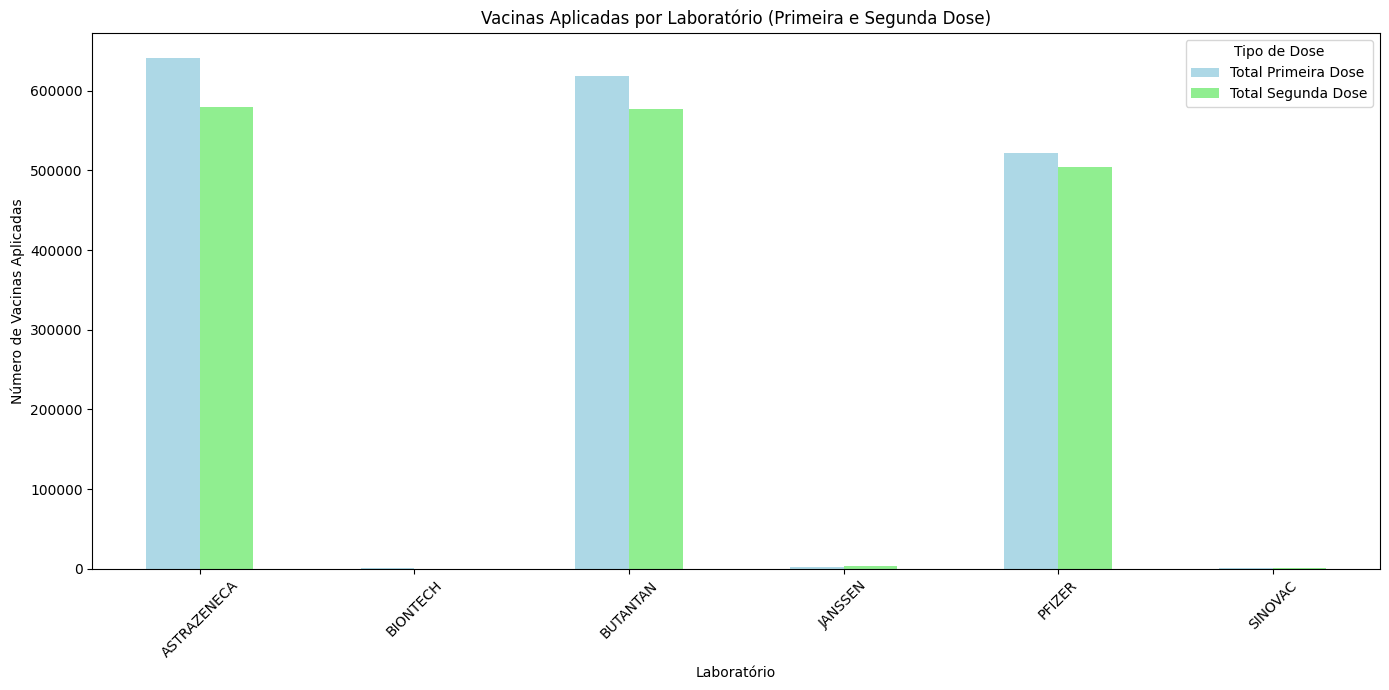

In [18]:
# Gráfico de barras para total de vacinas aplicadas por laboratório
vacinas_total.plot(x='Laboratório', y=['Total Primeira Dose', 'Total Segunda Dose'], kind='bar', figsize=(14, 7), color=['lightblue', 'lightgreen'])
plt.title('Vacinas Aplicadas por Laboratório (Primeira e Segunda Dose)')
plt.xlabel('Laboratório')
plt.ylabel('Número de Vacinas Aplicadas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Dose')
plt.tight_layout()

In [19]:
# Exibir o gráfico
plt.show()

C:\Users\kmhar\AppData\Local\Temp\ipykernel_5160\3204531072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Laboratório', y='Total', data=vacinas_total, palette='viridis', legend=False)


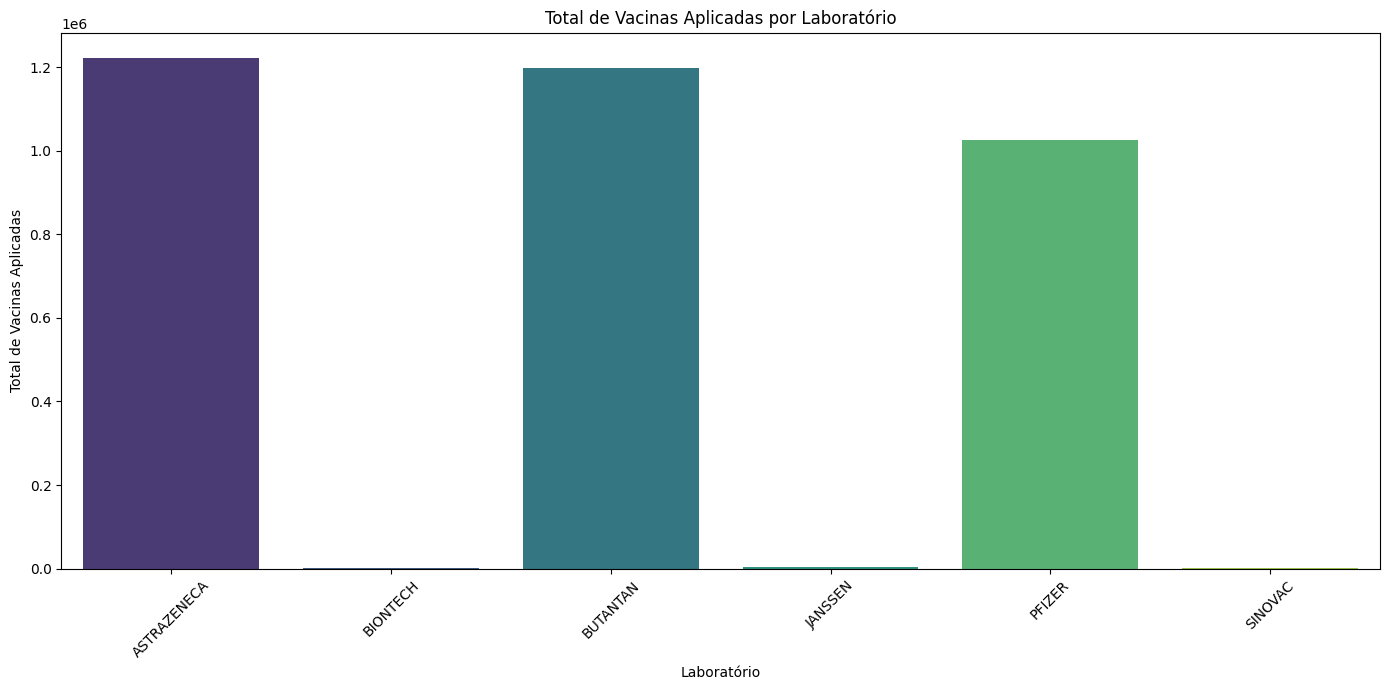

In [20]:
# Gráfico de barras para o total de vacinas aplicadas (soma de todas as doses)
plt.figure(figsize=(14, 7))
sns.barplot(x='Laboratório', y='Total', data=vacinas_total, palette='viridis', legend=False)
plt.title('Total de Vacinas Aplicadas por Laboratório')
plt.xlabel('Laboratório')
plt.ylabel('Total de Vacinas Aplicadas')
plt.xticks(rotation=45)
plt.tight_layout()

In [21]:
# Exibir o gráfico
plt.show()